# Mathematical Underpinnings - Lab 2

## Task 1

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(123)
import tqdm

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

$EX^2-(EX)^2=1$ => EX^2 = 1 + 0^2 = 1

$$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 =  \mathbb{E}(aX - (X+ \epsilon))^2 = $$

$$ =  \mathbb{E}((a-1)X- \epsilon)^2 = (a-1)^2\mathbb{E}{X^2} - 2(a-1)\mathbb{E}{(X\epsilon)}+\mathbb{E}{\epsilon^{2}} = $$

$$ = (a-1)^2\mathbb{E}{X^2} - 2(a-1)\mathbb{E}{X}\mathbb{E}{\epsilon}+\mathbb{E}{\epsilon^{2}} = $$

$$ = (a-1)^{2}*1-2(a-1)*0*0+\sigma^2$$

$$R(a,a^{*}) = (a-1)^{2}+\sigma^{2}$$

In [4]:
def population_risk(a, sigma_eps):
    return (a - 1) **2 + sigma_eps **2

### b)

In [5]:
# sampling
n = 50
sigma_eps = 1
X = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma_eps, n)
a0 = 1
Y = a0 *X + eps

Empirical risk: $ \hat R(a,a^*) = \frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [6]:
def empirical_risk(a, x, y):
    return np.sum((a*x-y)**2)/y.shape[0]

### c)

In [7]:
pop_risks = []
emp_risks = []
A = np.linspace(0,2,200)
for a in A:
    pop_risks.append(population_risk(a, sigma_eps))
    emp_risks.append(empirical_risk(a,X,Y))
pop_risks = np.array(pop_risks)
emp_risks = np.array(emp_risks)

In [8]:
pop_idx = np.argmin(pop_risks)
emb_idx = np.argmin(emp_risks)

a_emp_min = A[emb_idx]
emp_min = emp_risks[emb_idx]

In [9]:
a_hat = a_emp_min

In [10]:
from scipy.optimize import minimize
def empirical_risk_x_y(a):
    return empirical_risk(a,X,Y)
result_minimization=minimize(empirical_risk_x_y,x0=0)

In [11]:
result_minimization.x[0]

0.9242157159148948

In [12]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression(fit_intercept=False)
mod.fit(X.reshape(-1,1),Y)
mod.coef_[0]

0.9242157246390876

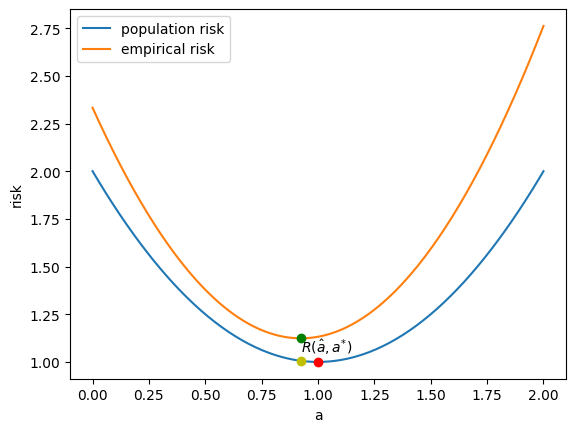

In [13]:
plt.plot(A,pop_risks)
plt.plot(A,emp_risks)
plt.legend(['population risk','empirical risk'])
plt.xlabel('a')
plt.ylabel('risk')

r_a_zero_a_star = population_risk(a0, sigma_eps)
plt.plot(a0,r_a_zero_a_star,'ro')
plt.plot(a_hat,emp_min,'go')
r_a_hat_a_star = population_risk(a_hat,sigma_eps)
plt.plot(a_hat,r_a_hat_a_star,'yo')
plt.text(a_hat,r_a_hat_a_star+0.05,'$R(\hat a,a^{*})$')
#plt.plot(a_pop_min,empirical_risk(a_pop_min,X,Y),'mo')
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [14]:
r_a_hat_a_star - r_a_zero_a_star

0.005681674705184214

In [15]:
def excess_risk(sample_size, L=200, a0=1, sigma_eps=1):
    N = 200

    exc_risks = []
    for i in range(L):
        X = np.random.normal(0, 1, sample_size)
        eps = np.random.normal(0, sigma_eps, sample_size)
        Y = a0 *X + eps

        pop_risks = []
        emp_risks = []
        A = np.linspace(0,2,N)
        for a in A:
            pop_risks.append(population_risk(a, sigma_eps))
            emp_risks.append(empirical_risk(a,X,Y))
        pop_risks = np.array(pop_risks)
        emp_risks = np.array(emp_risks)

        mod = LinearRegression(fit_intercept=False)
        mod.fit(X.reshape(-1,1),Y)
        a_hat = mod.coef_[0]

        r_a_zero_a_star = population_risk(a0, sigma_eps)
        r_a_hat_a_star = population_risk(a_hat,sigma_eps)
        exc_risk = r_a_hat_a_star - r_a_zero_a_star
        exc_risks.append(exc_risk)
    return sum(exc_risks) / len(exc_risks)

In [102]:
import tqdm
all_excess_risks = []
for i in tqdm.tqdm(np.linspace(10,500,100)):
    all_excess_risks.append(excess_risk(int(i)))

100%|██████████| 100/100 [01:33<00:00,  1.06it/s]


Text(0, 0.5, 'excess risk')

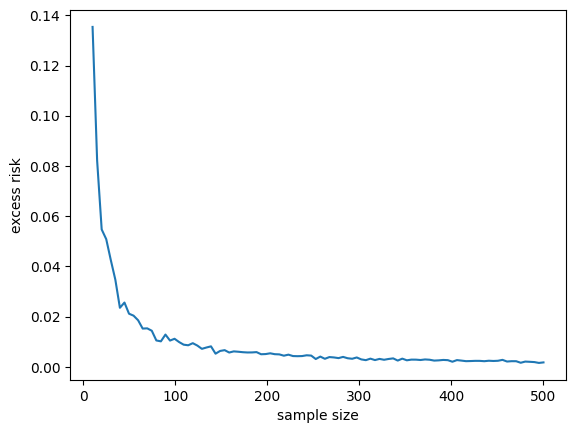

In [103]:
plt.plot(np.linspace(10,500,100),all_excess_risks)
plt.xlabel('sample size')
plt.ylabel('excess risk')